Coefficients: b0=1.193378548937778, b1=1.95531320077062


ValueError: operands could not be broadcast together with shapes (100,) (50,) 

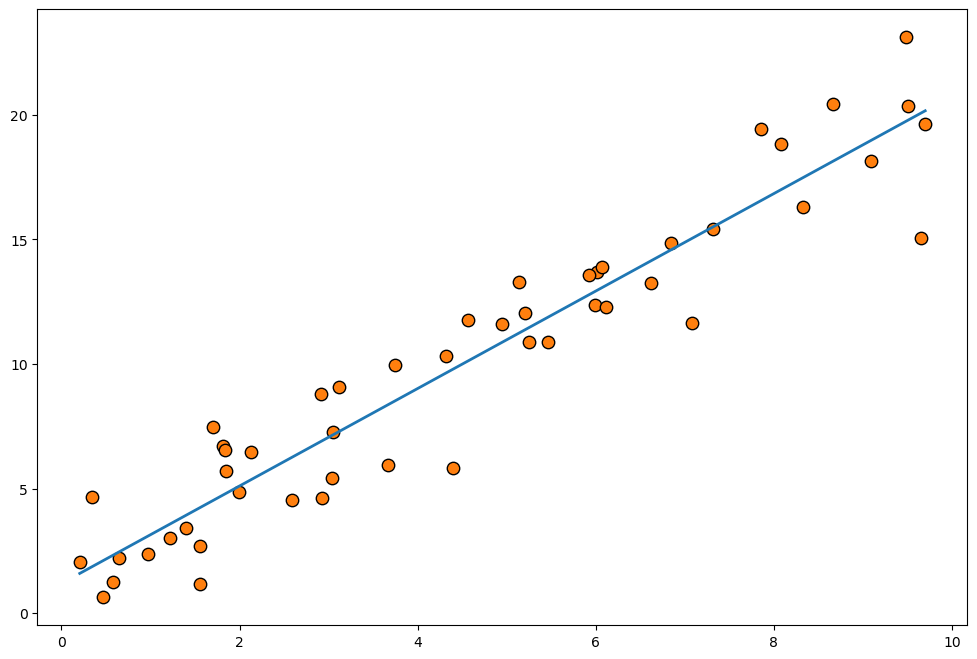

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

def mean(values):
    return sum(values) / len(values)

def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

def variance(values, mean_value):
    return sum((x - mean_value) ** 2 for x in values)

def coefficients(x, y):
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    return b0, b1

def residuals(y, y_pred):
    return y - y_pred

def standard_error_residuals(residuals):
    return np.sqrt(sum(residuals ** 2) / (len(residuals) - 2))

def confidence_interval(x, b0, b1, residuals, alpha=0.05):
    se_residuals = standard_error_residuals(residuals)
    t_value = t.ppf(1 - alpha / 2, len(x) - 2)
    interval = t_value * se_residuals * np.sqrt(1/len(x) + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    return interval

def simple_linear_regression(x_train, y_train):
    b0, b1 = coefficients(x_train, y_train)
    y_pred = [b0 + b1 * x for x in x_train]
    resid = residuals(y_train, y_pred)
    return b0, b1, resid

def plot_results(x, y, b0, b1, resid):
    plt.figure(figsize=(12, 8))

    # Plotting the data points
    plt.scatter(x, y, color='#ff7f0e', label='Data Points', edgecolors='black', s=80)

    # Plotting the regression line
    x_line = np.linspace(min(x), max(x), 100)
    y_line = b0 + b1 * x_line
    plt.plot(x_line, y_line, color='#1f77b4', linewidth=2, label='Regression Line')

    # Plotting the confidence interval
    interval = confidence_interval(x, b0, b1, resid)
    plt.fill_between(x_line, y_line - interval, y_line + interval, color='#1f77b4', alpha=0.2, label='95% Confidence Interval')

    # Adding labels and title with enhanced styling
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.title('Linear Regression with Confidence Interval', fontsize=16)

    # Adding grid lines
    plt.grid(True, linestyle='--', alpha=0.6)

    # Adding legend with larger font size
    plt.legend(fontsize=12)

    # Display the plot
    plt.show()

# Example usage:
# Assuming x_train, y_train are your training features and labels respectively.

# Generate example data
np.random.seed(42)
x_train = np.random.rand(50) * 10  # 50 random values for x
y_train = 2 * x_train + 1 + np.random.randn(50) * 2  # Linear relationship with noise

# Linear Regression
b0, b1, resid = simple_linear_regression(x_train, y_train)
print(f'Coefficients: b0={b0}, b1={b1}')

# Visualization
plot_results(x_train, y_train, b0, b1, resid)

